In [5]:
import backtrader as bt
import datetime

In [6]:
cerebro = bt.Cerebro()

cerebro.broker.set_cash(1000000)

data = bt.feeds.YahooFinanceCSVData(
    dataname='orcl-1995-2014.txt',
    # Do not pass values before this date
    fromdate=datetime.datetime(2000, 1, 1),
    # Do not pass values after this date
    todate=datetime.datetime(2000, 12, 31),
    reverse=False)

cerebro.adddata(data)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00


In [7]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.order = None
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
             return
            
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED {order.executed.price}')
            elif order.issell():
                self.log(f'SELL EXECUTED {order.executed.price}')
            
            self.bar_executed = len(self)
        
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return
        
        if not self.position:
            
            if self.dataclose[0] < self.dataclose[-1]:
                # current close less than previous close

                if self.dataclose[-1] < self.dataclose[-2]:
                    # previous close less than the previous close

                    # BUY, BUY, BUY!!! (with all possible default parameters)
                    self.log('BUY CREATED, %.2f' % self.dataclose[0])
                    self.buy()
        else:
            if len(self) >= (self.bar_executed + 5):
                self.log(f'SELL CREATED {self.dataclose[0]}')
                self.order = self.sell()

2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATED, 22.68
2000-01-06, BUY EXECUTED 25.04
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATED 23.36
2000-01-14, SELL EXECUTED 27.25
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATED, 23.04
2000-01-28, BUY EXECUTED 25.75
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATED 25.71
2000-02-07, SELL EXECUTED 29.66
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66


<IPython.core.display.Javascript object>


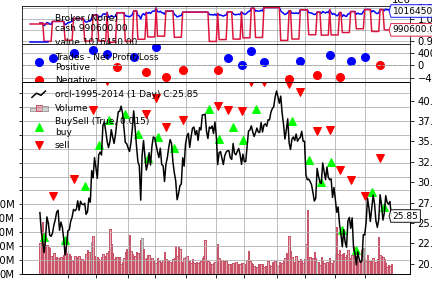

[[<Figure size 432x288 with 4 Axes>]]

In [8]:
cerebro.addstrategy(TestStrategy)

cerebro.addsizer(bt.sizers.FixedSize, stake=1000)

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.plot()